# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Sidney Paola Aguirre Castro 
#### Segundo Integrante: John Alexander Galeano Ospina

In [13]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [14]:
#cargamos la bd de entrenamiento
db = np.loadtxt('BDatos/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [15]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

Definimos la función

In [16]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [91]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
#clf = SVR(kernel='rbf', C:

#Implemetamos la metodología de validación cross validation con 10 folds
Folds = 5
psv_mean = np.zeros(5)
Errores = np.ones(Folds)
j = 0
kf = KFold(n_splits=Folds)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index] 
    
    #Normalizamos los datos
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
       
    #Complete el código
    #Penalty parameter C of the error term.
    C = 10
    #Kernel ['linear',‘rbf’] Specifies the kernel type to be used in the algorithm.
    kernel = 'linear'
    #Gamma 
    #gamma = 1
    gamma = 'auto' #para gamma=0.
    modelo = SVR(kernel=kernel, gamma=gamma, C=C)
    
    # Entrenar el modelo
    modelo = modelo.fit(X_train, y_train)
      
    # Validación del modelo
    ypred = modelo.predict(X_test)
    #sacamos el porcentaje de los vectores de soporte
    psv = modelo.support_vectors_
    psv_mean[j] = psv.size/X_train.size
    
    Errores[j] = MAPE(ypred, y_test)
    j+=1

print("C: " + str(C) + " - gamma: " +str(gamma) )
print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("% Vectores de Soporte: " + str(np.mean(psv_mean)))

print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.")


C: 10 - gamma: auto

Error de validación: 0.2866052170692736 +/- 0.1500497705716069
% Vectores de Soporte: 0.38633249759104876


Tiempo total de ejecución: 199.879873752594 segundos.


## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [69]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["MAPE Promedio"][23] = "0.2259"
df_types["Intervalo de confianza"][23] = "0.1109"
df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [71]:
qgrid_widget.get_changed_df()

MAPE Promedio Intervalo de confianza  \
Kernel C       gamma                                        
lineal 0.001   0.00         0.2153                 0.0646   
       0.010   0.00         0.2449                 0.0962   
       0.100   0.00         0.2768                 0.1346   
       1.000   0.00         0.2869                 0.1507   
       10.000  0.00         0.2866                 0.1500   
       100.000 0.00         0.2885                 0.1531   
rbf    0.001   0.01         0.4014                 0.2062   
               0.10         0.3285                 0.1402   
               1.00         0.4905                 0.2859   
       0.010   0.01         0.1830                 0.0380   
               0.10         0.1792                 0.0505   
               1.00         0.3905                 0.2341   
       0.100   0.01         0.1474                 0.0382   
               0.10         0.1499                 0.0544   
               1.00         0.2685                 0.1504   
       1.000   0.01         0.2044                 0.1874   
               0.10         0.1916                 0.1404   
               1.00         0.2378                 0.1299   
       10.000  0.01         0.5590                 0.9123   
               0.10         0.1802                 0.1709   
               1.00         0.2226                 0.1082   
       100.000 0.01         0.6903                 1.2096   
               0.10         0.2141                 0.2035   
               1.00         0.2259                 0.1109   

                     % de Vectores de Soporte  
Kernel C       gamma                           
lineal 0.001   0.00                    0.3786  
       0.010   0.00                    0.3766  
       0.100   0.00                    0.3849  
       1.000   0.00                    0.3862  
       10.000  0.00                    0.3863  
       100.000 0.00                    0.3863  
rbf    0.001   0.01                    0.7470  
               0.10                    0.6425  
               1.00                    0.7693  
       0.010   0.01                    0.4433  
               0.10                    0.2780  
               1.00                    0.5615  
       0.100   0.01                    0.1904  
               0.10                    0.1517  
               1.00                    0.2690  
       1.000   0.01                    0.1220  
               0.10                    0.1657  
               1.00                    0.2166  
       10.000  0.01                    0.1637  
               0.10                    0.1044  
               1.00                    0.2132  
       100.000 0.01                    0.1021  
               0.10                    0.1046  
               1.00                    0.2191

**3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?**

R/: La finalidad de usar funciones kernel en el modelo SVM es poder proyectar el espacio de características a un espacio con una dimensión mayor para hacer que una función lineal se aproxime más a los puntos. 

**3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.**

R/: Comparando con la información que el porcentaje de vectores de soporte ofrece en el problema de clasificación, decimos que **sí** se obtiene una información similar en el caso de regresión, porque analizando los resultados, mientras más cantidad de vectores de soporte, menor es la eficiencia del modelo, y mayor el porcentaje promedio de error.


3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

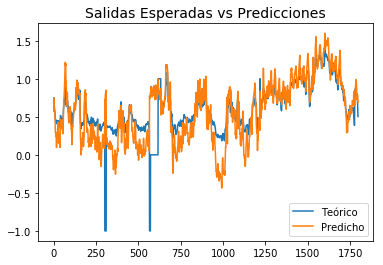

Costo computacional:  525.7940120697021  s


In [92]:
#Complete el código para hacer la gráfica aquí

plt.title('Salidas Esperadas vs Predicciones', fontsize=14)
plt.plot(y_test)
plt.plot(ypred)
plt.legend(['Teórico', 'Predicho'], loc=4)
plt.show()

print('Costo computacional: ', time.time()-tiempo_i, ' s')